<a href="https://colab.research.google.com/github/ojasviG/VulAIAssessModel/blob/main/VulAIAssessModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assessing Vulnerability of an AI model throuogh NLP analysis on the AVID Data

In [ ]:
!git clone https://github.com/avidml/avid-db.git

fatal: destination path 'avid-db' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [ ]:
import glob, os, json, csv

In [ ]:
import pandas as pd
import json

with open('/content/avid-db/reports/2023/AVID-2023-R0001.json') as f:
    data = json.load(f)

# Use pd.json_normalize to convert the JSON to a DataFrame
df1 = pd.json_normalize(data)

# Rename the columns for clarity
#df.columns = ['data_type', 'data_version', 'metrics', 'references', 'metadata.report_id', 'affects.developer', 'affects.deployer', 'affects.artifacts', 'problemtype.classof', 'problemtype.type', 'problemtype.description.lang','problemtype.description.value', 'description.lang', 'description.value', 'impact.avid.vuln_id', 'impact.avid.risk_domain', 'impact.avid.sep_view', 'impact.avid.lifecycle_view', 'impact.avid.taxonomy_version' ,'credit', 'reported_date']

# Display the DataFrame
df1.head()

,data_type,data_version,metrics,references,credit,reported_date,metadata.report_id,affects.developer,affects.deployer,affects.artifacts,...,problemtype.type,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.vuln_id,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version
0,AVID,0.2,[],"[{'type': 'source', 'label': 'Gwern's analysis...","[{'lang': 'eng', 'value': 'Allen Roush, Oracle...",2023-01-13,AVID-2023-R0001,[OpenAI],[OpenAI],"[{'type': 'System', 'name': 'ChatGPT'}]",...,Advisory,eng,ChatGPT fails to follow lexical constraints,eng,When prompting ChatGPT with lexical constraint...,AVID-2023-V001,[Performance],[P0204: Accuracy],"[L02: Data Understanding, L04: Model Developme...",0.2


In [ ]:
with open('/content/avid-db/reports/2023/AVID-2023-R0002.json') as f:
    data = json.load(f)

# Use pd.json_normalize to convert the JSON to a DataFrame
df2 = pd.json_normalize(data)

# Rename the columns for clarity
#df.columns = ['data_type', 'data_version', 'metrics', 'references', 'metadata.report_id', 'affects.developer', 'affects.deployer', 'affects.artifacts', 'problemtype.classof', 'problemtype.type', 'problemtype.description.lang','problemtype.description.value', 'description.lang', 'description.value', 'impact.avid.vuln_id', 'impact.avid.risk_domain', 'impact.avid.sep_view', 'impact.avid.lifecycle_view', 'impact.avid.taxonomy_version' ,'credit', 'reported_date']

# Display the DataFrame
df2.head()

,data_type,data_version,metrics,references,credit,reported_date,metadata.report_id,affects.developer,affects.deployer,affects.artifacts,...,problemtype.type,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.vuln_id,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version
0,AVID,0.2,[],"[{'type': 'screenshot', 'label': 'Screenshot o...","[{'lang': 'eng', 'value': 'Jaydeep Borkar, N/A'}]",2023-01-05,AVID-2023-R0002,[OpenAI],[OpenAI],"[{'type': 'System', 'name': 'ChatGPT'}]",...,Issue,eng,ChatGPT links wrong authors to papers,eng,I asked ChatGPT to recommend papers on explain...,,[Ethics],[E0402: Generative Misinformation],"[L05: Evaluation, L06: Deployment]",0.2


In [ ]:

json_dir = '/content/avid-db/reports/2023'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs2023 = []
for file in file_list:
  with open(file) as f:
    json_data = pd.json_normalize(json.loads(f.read()))
    json_data['site'] = file.rsplit("/", 1)[-1]
  dfs2023.append(json_data)
df2023 = pd.concat(dfs2023)

In [ ]:
df2023

,data_type,data_version,metrics,references,credit,reported_date,metadata.report_id,affects.developer,affects.deployer,affects.artifacts,...,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.vuln_id,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version,site
0,AVID,0.2,[],"[{'type': 'source', 'label': 'InjectGPT: the m...","[{'lang': 'eng', 'value': 'Lucas Luitjes, N/A'}]",2023-03-26,AVID-2023-R0003,[OpenAI],"[OpenAI, boxcars.ai]","[{'type': 'System', 'name': 'ChatGPT'}, {'type...",...,eng,It is possible to make ChatGPT perform remote ...,eng,Frameworks like langchain (Python) and boxcars...,AVID-2023-V003,[Ethics],"[S0100: Software Vulnerability, S0201: Model C...","[L04: Model Development, L05: Evaluation, L06:...",0.2,AVID-2023-R0003.json
0,AVID,0.2,[],"[{'type': 'screenshot', 'label': 'Screenshot o...","[{'lang': 'eng', 'value': 'Jaydeep Borkar, N/A'}]",2023-01-05,AVID-2023-R0002,[OpenAI],[OpenAI],"[{'type': 'System', 'name': 'ChatGPT'}]",...,eng,ChatGPT links wrong authors to papers,eng,I asked ChatGPT to recommend papers on explain...,,[Ethics],[E0402: Generative Misinformation],"[L05: Evaluation, L06: Deployment]",0.2,AVID-2023-R0002.json
0,AVID,0.2,[],"[{'type': 'source', 'label': 'Gwern's analysis...","[{'lang': 'eng', 'value': 'Allen Roush, Oracle...",2023-01-13,AVID-2023-R0001,[OpenAI],[OpenAI],"[{'type': 'System', 'name': 'ChatGPT'}]",...,eng,ChatGPT fails to follow lexical constraints,eng,When prompting ChatGPT with lexical constraint...,AVID-2023-V001,[Performance],[P0204: Accuracy],"[L02: Data Understanding, L04: Model Developme...",0.2,AVID-2023-R0001.json


In [ ]:
json_dir = '/content/avid-db/reports/2022'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs1 = []
for file in file_list:
  with open(file) as f:
    json_data = pd.json_normalize(json.loads(f.read()))
    json_data['site'] = file.rsplit("/", 1)[-1]
  dfs1.append(json_data)
df2022 = pd.concat(dfs1)

In [ ]:
df2022

,data_type,data_version,metrics,references,credit,reported_date,metadata.report_id,affects.developer,affects.deployer,affects.artifacts,...,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.vuln_id,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version,site
0,AVID,0.1,"[{'name': 'Probability', 'features': {'measure...","[{'type': 'source', 'label': 'Gender Bias Eval...","[{'lang': 'eng', 'value': 'Harry Saini, AVID'}...",2022-11-09,AVID-2022-R0004,[],[HuggingFace],"[{'type': 'Model', 'name': 'xlm-roberta-base'}...",...,eng,Profession bias reinforcing gender stereotypes...,eng,Filling in pronouns in sentences tagged with p...,AVID-2022-V002,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-R0004.json
0,AVID,0.1,"[{'name': 'Toxicity score', 'features': {'meas...","[{'type': 'source', 'label': 'Gender Bias Eval...","[{'lang': 'eng', 'value': 'Subho Majumdar, AVI...",2022-11-09,AVID-2022-R0005,[EleutherAI],[HuggingFace],"[{'type': 'Model', 'name': 'EleutherAI/gpt-neo...",...,eng,Demographic bias found in EleutherAI/gpt-neo-1...,eng,When supplied with prompts from the BOLD datas...,AVID-2022-V003,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-R0005.json
0,AVID,0.1,"[{'name': 'HONEST', 'features': {'measured': '...","[{'type': 'source', 'label': 'Gender Bias Eval...","[{'lang': 'eng', 'value': 'Harry Saini, AVID'}...",2022-11-09,AVID-2022-R0001,[],[HuggingFace],"[{'type': 'Model', 'name': 'bert-base-uncased'}]",...,eng,Gender Bias in Sentence Completion Tasks perfo...,eng,Sentence completions by bert-base-uncased were...,AVID-2022-V001,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-R0001.json
0,AVID,0.1,"[{'name': 'Probability', 'features': {'measure...","[{'type': 'source', 'label': 'Gender Bias Eval...","[{'lang': 'eng', 'value': 'Harry Saini, AVID'}...",2022-11-09,AVID-2022-R0003,[],[HuggingFace],"[{'type': 'Model', 'name': 'bert-base-uncased'...",...,eng,Profession bias reinforcing gender stereotypes...,eng,Filling in pronouns in sentences tagged with p...,AVID-2022-V001,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-R0003.json
0,AVID,0.1,"[{'name': 'HONEST', 'features': {'measured': '...","[{'type': 'source', 'label': 'Gender Bias Eval...","[{'lang': 'eng', 'value': 'Harry Saini, AVID'}...",2022-11-09,AVID-2022-R0002,[],[HuggingFace],"[{'type': 'Model', 'name': 'xlm-roberta-base'}]",...,eng,Gender Bias in Sentence Completion Tasks perfo...,eng,Sentence completions by xlm-roberta-base were ...,AVID-2022-V002,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-R0002.json


In [ ]:
json_dir = '/content/avid-db/vulnerabilities/2023'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfsvul2023 = []
for file in file_list:
  with open(file) as f:
    json_data = pd.json_normalize(json.loads(f.read()))
    json_data['site'] = file.rsplit("/", 1)[-1]
  dfsvul2023.append(json_data)
dfvul2023 = pd.concat(dfsvul2023)


In [ ]:
dfvul2023

,data_type,data_version,references,reports,credit,published_date,last_modified_date,metadata.vuln_id,affects.developer,affects.deployer,...,problemtype.type,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version,site
0,AVID,0.2,"[{'type': 'source', 'label': 'ProofPoint Evasi...",None,None,2023-03-31,2023-03-31,AVID-2023-V009,[],[ProofPoint Email Protection System],...,Advisory,eng,ProofPoint Evasion,eng,Proof Pudding (CVE-2019-20634) is a code repos...,[Security],[S0403: Adversarial Example],[L06: Deployment],0.2,AVID-2023-V009.json
0,AVID,0.2,[{'label': 'Incident 1: Google’s YouTube Kids ...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, AIID'}]",2023-03-30,2023-03-30,AVID-2023-V017,[YouTube],[YouTube],...,NaN,eng,Google’s YouTube Kids App Presents Inappropria...,eng,YouTube’s content filtering and recommendation...,[Performance],[P0401: Psychological Safety],[L06: Deployment],0.2,AVID-2023-V017.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Microsoft Azure ...",None,None,2023-03-31,2023-03-31,AVID-2023-V010,[],[Internal Microsoft Azure Service],...,Advisory,eng,Microsoft Azure Service Disruption,eng,The Microsoft AI Red Team performed a red team...,[Security],"[S0100: Software Vulnerability, S0301: Informa...",[L06: Deployment],0.2,AVID-2023-V010.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Backdoor Attack ...",None,None,2023-03-31,2023-03-31,AVID-2023-V013,[],[ML-based Android Apps],...,Advisory,eng,Backdoor Attack on Deep Learning Models in Mob...,eng,Deep learning models are increasingly used in ...,[Security],"[S0201: Model Compromise, S0601: Ingest Poison...","[L06: Deployment, L04: Model Development]",0.2,AVID-2023-V013.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Botnet Domain Ge...",None,None,2023-03-31,2023-03-31,AVID-2023-V002,[],[Palo Alto Networks ML-based DGA detection mod...,...,Advisory,eng,Botnet Domain Generation Algorithm (DGA) Detec...,eng,The Palo Alto Networks Security AI research te...,[Security],[S0403: Adversarial Example],[L06: Deployment],0.2,AVID-2023-V002.json
0,AVID,0.2,"[{'type': 'source', 'label': 'InjectGPT: the m...","[{'report_id': 'AVID-2023-R0004', 'type': 'Adv...","[{'lang': 'eng', 'value': 'Lucas Luitjes, N/A'}]",2023-03-31,2023-03-31,AVID-2023-V028,[OpenAI],"[OpenAI, boxcars.ai]",...,Advisory,eng,It is possible to make ChatGPT perform remote ...,eng,Frameworks like langchain (Python) and boxcars...,[Ethics],"[S0100: Software Vulnerability, S0201: Model C...","[L04: Model Development, L05: Evaluation, L06:...",0.2,AVID-2023-V028.json
0,AVID,0.2,[{'label': 'Incident 11: Northpointe Risk Mode...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, AIID'}]",2023-03-30,2023-03-30,AVID-2023-V024,[Northpointe],[Northpointe],...,NaN,eng,Northpointe Risk Models,eng,An algorithm developed by Northpointe and used...,[Performance],"[E0101: Group fairness, P0403: Socioeconomic s...",[L06: Deployment],0.2,AVID-2023-V024.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Gwern's analysis...","[{'report_id': 'AVID-2023-R0002', 'type': 'Adv...","[{'lang': 'eng', 'value': 'Allen Roush, Oracle...",2023-03-31,2023-03-31,AVID-2023-V026,[OpenAI],[OpenAI],...,Advisory,eng,ChatGPT fails to follow lexical constraints,eng,When prompting ChatGPT with lexical constraint...,[Performance],[P0204: Accuracy],"[L02: Data Understanding, L04: Model Developme...",0.2,AVID-2023-V026.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Bypassing Cylanc...",None,None,2023-03-31,2023-03-31,AVID-2023-V004,[],"[CylancePROTECT, Cylance Smart Antivirus]",...,Advisory,eng,Bypassing Cylance's AI Malware Detection,eng,Researchers at Skylight were able to create a ...,[Security],[S0403: Adversarial Example],[L06: Deployment],0.2,AVID-2023-V004.json
0,AVID,0.2,"[{'type': 'source', 'label': 'Compromised PyTo...",None,"[{'lang': 'eng', 'value': 'PyTorch'}]",2023-03-31,2023-03-31,AVID-2023-V015,[],[PyTorch],...,Ad

In [ ]:

json_dir = '/content/avid-db/vulnerabilities/2022'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfsvul2022 = []
for file in file_list:
  with open(file) as f:
    json_data = pd.json_normalize(json.loads(f.read()))
    json_data['site'] = file.rsplit("/", 1)[-1]
  dfsvul2022.append(json_data)
dfvul2022 = pd.concat(dfsvul2022)

In [ ]:
dfvul2022

,data_type,data_version,references,reports,credit,published_date,last_modified_date,metadata.vuln_id,affects.developer,affects.deployer,...,problemtype.classof,problemtype.description.lang,problemtype.description.value,description.lang,description.value,impact.avid.risk_domain,impact.avid.sep_view,impact.avid.lifecycle_view,impact.avid.taxonomy_version,site
0,AVID,0.1,[{'label': 'Incident 4: Uber AV Killed Pedestr...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, Khoa...",2022-12-23,2022-12-23,AVID-2022-V005,[Uber],[Uber],...,AIID Incident,eng,Uber AV Killed Pedestrian in Arizona,eng,An Uber autonomous vehicle (AV) in autonomous ...,[Performance],[P0402: Physical safety],[L06: Deployment],0.1,AVID-2022-V005.json
0,AVID,0.1,[{'label': 'Incident 68: Security Robot Drowns...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, AIID'}]",2022-12-23,2022-12-23,AVID-2022-V008,[Knightscope],[Knightscope],...,AIID Incident,eng,Security Robot Drowns Itself in a Fountain,eng,A Knightscope K5 security robot ran itself int...,[Performance],[P0402: Physical safety],[L06: Deployment],0.1,AVID-2022-V008.json
0,AVID,0.1,[{'label': 'Incident 137: Israeli Tax Authorit...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, Khoa...",2022-12-23,2022-12-23,AVID-2022-V007,[],[],...,AIID Incident,eng,Israeli Tax Authority Employed Opaque Algorith...,eng,An Israeli farmer was imposed a computer gener...,[Ethics],[E0202: Local explanations],[L06: Deployment],0.1,AVID-2022-V007.json
0,AVID,0.1,[{'label': 'Incident 223: Hive Box Facial-Reco...,[],"[{'lang': 'eng', 'value': 'Khoa Lam, AIID'}]",2022-12-23,2022-12-23,AVID-2022-V012,[Hive Box],[Hive Box],...,AIID Incident,eng,Hive Box Facial-Recognition Locks Hacked by Fo...,eng,"Facial-recognition locks by Hive Box, an expre...",[Security],[S0403: Adversarial Example],[L06: Deployment],0.1,AVID-2022-V012.json
0,AVID,0.1,[{'label': 'bert-base-uncased on Hugging Face'...,"[{'report_id': 'AVID-2022-R0001', 'type': 'Det...","[{'lang': 'eng', 'value': 'Harry Saini, AVID'}...",2022-12-23,2022-12-23,AVID-2022-V001,[],[HuggingFace],...,LLM Evaluation,eng,Gender Bias in Sentence Completion Tasks perfo...,eng,Sentence Completion Tasks performed by bert-ba...,[Ethics],[E0101: Group fairness],[L05: Evaluation],0.1,AVID-2022-V001.json
0,AVID,0.1,"[{'label': 'Incident 6: TayBot', 'url': 'https...",[],"[{'lang': 'eng', 'value': 'Sean McGregor, AIID'}]",2022-12-23,2022-12-23,AVID-2022-V013,[Microsoft],[Microsoft],...,AIID Incident,eng,TayBot,eng,"Microsoft's Tay, an artificially intelligent c...","[Security, Ethics]","[S0601: Ingest Poisoning, E0101: Group fairnes...",[L06: Deployment],0.1,AVID-2022-V013.json
0,AVID,0.1,[{'label': 'Incident 281: YouTube's Algorithms...,[],"[{'lang': 'eng', 'value': 'Khoa Lam, AIID'}]",2022-12-23,2022-12-23,AVID-2022-V006,[YouTube],[YouTube],...,AIID Incident,eng,YouTube's Algorithms Failed to Remove Violatin...,eng,Terms-of-service-violating videos related to s...,[Performance],"[P0401: Psychological Safety, P0402: Physical ...",[L06: Deployment],0.1,AVID-2022-V006.json
0,AVID,0.1,[{'label': 'Incident 198: Deepfake Video of Uk...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, Khoa...",2022-12-23,2022-12-23,AVID-2022-V009,[],[],...,AIID Incident,eng,Deepfake Video of Ukrainian President Yielding...,eng,A quickly-debunked deepfaked video of the Ukra...,[Ethics],[E0402: Generative Misinformation],[L06: Deployment],0.1,AVID-2022-V009.json
0,AVID,0.1,[{'label': 'Predictive Policing Biases of Pred...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, AIID'}]",2022-12-23,2022-12-23,AVID-2022-V011,[PredPol],[Chicago Police Department],...,AIID Incident,eng,Predictive Policing Biases of PredPol,eng,Predictive policing algorithms meant to aid la...,[Ethics],[E0101: Group fairness],[L06: Deployment],0.1,AVID-2022-V011.json
0,AVID,0.1,[{'label': 'Incident 72: Facebook translates '...,[],"[{'lang': 'eng', 'value': 'Sean McGregor, Khoa...",2022-12-23,2022-12-23,AVID-2022-V004,[Facebook],[Facebook],...,AIID Incident,eng,Face

In [ ]:
lisvul2022= [dfvul2022]

In [ ]:
dfvul2022['references'][0:4]

0    [{'label': 'Incident 4: Uber AV Killed Pedestr...
0    [{'label': 'Incident 68: Security Robot Drowns...
0    [{'label': 'Incident 137: Israeli Tax Authorit...
0    [{'label': 'Incident 223: Hive Box Facial-Reco...
Name: references, dtype: object

In [ ]:
!pip install avidtools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 16.5 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=9bd2f8f81868064e306ead5973336ce6fa118f25762e7f344a3d4c5ab3f93b0b
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [ ]:
from avidtools.connectors import atlas
atlas_casestudy = []

CS_ID = ['AML.CS0000', 'AML.CS0001', 'AML.CS0002', 'AML.CS0003', 'AML.CS0004', 'AML.CS0005', 'AML.CS0006', 'AML.CS0007', 'AML.CS0008', 'AML.CS0009', 'AML.CS0010', 'AML.CS0011', 'AML.CS0012', 'AML.CS0013', 'AML.CS0014', 'AML.CS0015', 'AML.CS0016', 'AML.CS0017', 'AML.CS0018', 'AML.CS0019', 'AML.CS0020', 'AML.CS0021']
for file in CS_ID:
  cs = atlas.import_case_study(file) # returns a dict in the original schema
  report = atlas.convert_case_study(cs) # returns a Report object
  atlas_casestudy.append(report)
dfatlas = pd.concat(atlas_casestudy, axis=1)

In [ ]:
dfatlas[3]

In [ ]:
dfsatl2022 = []
from avidtools.connectors import atlas
CS_ID = ['AML.CS0000', 'AML.CS0001', 'AML.CS0002', 'AML.CS0003', 'AML.CS0004', 'AML.CS0005', 'AML.CS0006', 'AML.CS0007', 'AML.CS0008', 'AML.CS0009', 'AML.CS0010', 'AML.CS0011', 'AML.CS0012', 'AML.CS0013', 'AML.CS0014', 'AML.CS0015', 'AML.CS0016', 'AML.CS0017', 'AML.CS0018', 'AML.CS0019', 'AML.CS0020', 'AML.CS0021']
for file in CS_ID:
    cs = atlas.import_case_study(file) # returns a dict in the original schema
    report = atlas.convert_case_study(cs) # returns a Report object
    atlas_casestudy.append(report)



In [ ]:
atlas_casestudy

In [ ]:
from avidtools.connectors import atlas

CS_ID = 'AML.CS0009'
cs9 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report9 = atlas.convert_case_study(cs9) # returns a Report object

CS_ID = 'AML.CS0001'
cs1 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report1 = atlas.convert_case_study(cs1) # returns a Report object

CS_ID = 'AML.CS0002'
cs2 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report2 = atlas.convert_case_study(cs2) # returns a Report object

CS_ID = 'AML.CS0003'
cs3 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report3 = atlas.convert_case_study(cs3) # returns a Report object

CS_ID = 'AML.CS0004'
cs4 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report4 = atlas.convert_case_study(cs4) # returns a Report object

CS_ID = 'AML.CS0005'
cs5 = atlas.import_case_study(CS_ID) # returns a dict in the original schema
report9 = atlas.convert_case_study(cs55) # returns a Report object

In [ ]:
lis = [dfvul2022['problemtype.description.value'][0]]
lis
listToStr = ' '.join([str(elem) for elem in lis])
listToStr

"0                 Uber AV Killed Pedestrian in Arizona\n0           Security Robot Drowns Itself in a Fountain\n0    Israeli Tax Authority Employed Opaque Algorith...\n0    Hive Box Facial-Recognition Locks Hacked by Fo...\n0    Gender Bias in Sentence Completion Tasks perfo...\n0                                               TayBot\n0    YouTube's Algorithms Failed to Remove Violatin...\n0    Deepfake Video of Ukrainian President Yielding...\n0                Predictive Policing Biases of PredPol\n0    Facebook translates 'good morning' into 'attac...\n0    Meta’s BlenderBot 3 Chatbot Demo Made Offensiv...\n0    Multiple fairness harms found in generated tex...\n0    Gender Bias in Sentence Completion Tasks perfo...\nName: problemtype.description.value, dtype: object"

In [ ]:
lis1 = [dfvul2023['problemtype.description.value'][0]]
lis1
listToStr1 = ' '.join([str(elem) for elem in lis1])
listToStr1

"0                                   ProofPoint Evasion\n0    Google’s YouTube Kids App Presents Inappropria...\n0                   Microsoft Azure Service Disruption\n0    Backdoor Attack on Deep Learning Models in Mob...\n0    Botnet Domain Generation Algorithm (DGA) Detec...\n0    It is possible to make ChatGPT perform remote ...\n0                              Northpointe Risk Models\n0          ChatGPT fails to follow lexical constraints\n0             Bypassing Cylance's AI Malware Detection\n0                 Compromised PyTorch Dependency Chain\n0                                 VirusTotal Poisoning\n0    Attack on Machine Translation Service - Google...\n0                         ClearviewAI Misconfiguration\n0    Crashes with Maneuvering Characteristics Augme...\n0                              GPT-2 Model Replication\n0    Face Identification System Evasion via Physica...\n0              Uber Autonomous Cars Running Red Lights\n0    Warehouse robot ruptures can of bear spray

# WORD CLOUD 2022

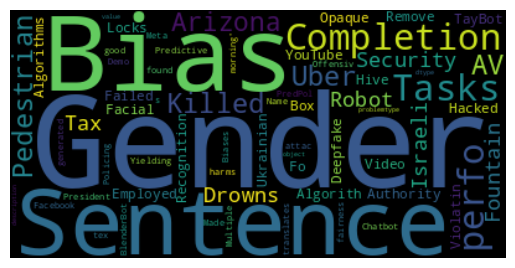

In [ ]:

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create the wordcloud object

wordcloud = WordCloud().generate(listToStr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WORD CLOUD 2023

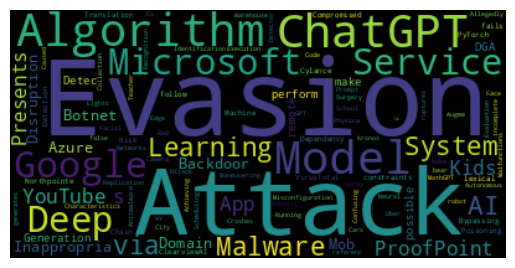

In [ ]:

wordcloud = WordCloud().generate(listToStr1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Word PreProcessing

In [ ]:
# Run in python console
import nltk; nltk.download('stopwords')
!pip install spacy
# Run in terminal or command prompt
!python -m spacy download en


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2023-12-19 00:20:14.155786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 00:20:14.155846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 00:20:14.158154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 00:20:14.169125: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 00:20:15.482573: W tensorflow/compiler/tf2

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
!pip install pyLDAvis
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

#Stopwords

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['-', '\n0', 'with', 'to', "'" ])

# Tokenize words and Clean-up text

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(dfvul2023['problemtype.description.value']))

print(data_words)

[['proofpoint', 'evasion'], ['google', 'youtube', 'kids', 'app', 'presents', 'inappropriate', 'content'], ['microsoft', 'azure', 'service', 'disruption'], ['backdoor', 'attack', 'on', 'deep', 'learning', 'models', 'in', 'mobile', 'apps'], ['botnet', 'domain', 'generation', 'algorithm', 'dga', 'detection', 'evasion'], ['it', 'is', 'possible', 'to', 'make', 'chatgpt', 'perform', 'remote', 'code', 'execution', 'just', 'by', 'asking', 'politely'], ['northpointe', 'risk', 'models'], ['chatgpt', 'fails', 'to', 'follow', 'lexical', 'constraints'], ['bypassing', 'cylance', 'ai', 'malware', 'detection'], ['compromised', 'pytorch', 'dependency', 'chain'], ['virustotal', 'poisoning'], ['attack', 'on', 'machine', 'translation', 'service', 'google', 'translate', 'bing', 'translator', 'and', 'systran', 'translate'], ['clearviewai'], ['crashes', 'with', 'maneuvering', 'characteristics', 'augmentation', 'system', 'mcas'], ['gpt', 'model', 'replication'], ['face', 'identification', 'system', 'evasion',

# BIGRAM AND TRIGRAM MODELLING

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['google', 'youtube', 'kids', 'app', 'presents', 'inappropriate', 'content']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

[['proofpoint', 'evasion'], ['present', 'inappropriate', 'content']]


# Creating corpus for topic modelling

In [ ]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1)], [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(0, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(13, 1), (28, 1), (29, 1)], [(20, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1), (39, 1), (40, 1)], [(41, 1), (42, 1)], [(6, 1), (8, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [], [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(13, 1), (54, 1)], [(0, 1), (53, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1)], [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(20, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(0, 1), (34, 1), (88, 1)], [(8, 1), (53, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(21, 1), (22

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:]]

[[('evasion', 1), ('proofpoint', 1)],
 [('content', 1), ('inappropriate', 1), ('present', 1)],
 [('disruption', 1), ('service', 1)],
 [('app', 1),
  ('attack', 1),
  ('backdoor', 1),
  ('deep', 1),
  ('learning', 1),
  ('mobile', 1),
  ('model', 1)],
 [('evasion', 1),
  ('botnet', 1),
  ('detection', 1),
  ('dga', 1),
  ('domain', 1),
  ('generation', 1)],
 [('ask', 1),
  ('chatgpt', 1),
  ('code', 1),
  ('execution', 1),
  ('make', 1),
  ('perform', 1),
  ('politely', 1),
  ('possible', 1),
  ('remote', 1)],
 [('model', 1), ('northpointe', 1), ('risk', 1)],
 [('chatgpt', 1),
  ('constraint', 1),
  ('fail', 1),
  ('follow', 1),
  ('lexical', 1)],
 [('ai', 1), ('bypass', 1), ('cylance', 1)],
 [('chain', 1), ('compromise', 1), ('dependency', 1), ('pytorch', 1)],
 [('poisoning', 1), ('virustotal', 1)],
 [('service', 1),
  ('attack', 1),
  ('bing', 1),
  ('machine', 1),
  ('translate', 1),
  ('translation', 1),
  ('translator', 1)],
 [],
 [('augmentation', 1),
  ('characteristic', 1),
  ('

# Building the LDA Model

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"model" + 0.041*"app" + 0.041*"deep" + 0.041*"mobile" + '
  '0.041*"backdoor" + 0.041*"learning" + 0.041*"school" + 0.041*"evaluation" + '
  '0.041*"contest" + 0.041*"city"'),
 (1,
  '0.042*"evasion" + 0.042*"ai" + 0.042*"service" + 0.022*"system" + '
  '0.022*"attack" + 0.022*"chatgpt" + 0.022*"machine" + 0.022*"translation" + '
  '0.022*"crash" + 0.022*"translate"'),
 (2,
  '0.065*"neural" + 0.065*"confusing" + 0.065*"antimalware" + 0.065*"network" '
  '+ 0.065*"virustotal" + 0.065*"poisoning" + 0.006*"evasion" + 0.006*"model" '
  '+ 0.006*"ai" + 0.006*"proofpoint"'),
 (3,
  '0.064*"chatgpt" + 0.034*"execution" + 0.034*"politely" + 0.034*"ask" + '
  '0.034*"code" + 0.034*"perform" + 0.034*"literature" + 0.034*"possible" + '
  '0.034*"reference" + 0.034*"remote"'),
 (4,
  '0.070*"deep" + 0.070*"learn" + 0.070*"traffic" + 0.070*"detector" + '
  '0.070*"evasion" + 0.006*"model" + 0.006*"ai" + 0.006*"poisoning" + '
  '0.006*"replication" + 0.006*"service"'),
 (5,
  '0.065*"

#Computing model perplexity

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.789989455938339

Coherence Score:  0.5924321950016426


This shows we have a coherence of 0.59, almost 60%

In [ ]:
#!pip install funcy
#!pip install tzdata
!pip install --no-deps pLDAvis
!pip install pandas==1.5.3

ERROR: Could not find a version that satisfies the requirement pLDAvis (from versions: none)
ERROR: No matching distribution found for pLDAvis
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.172841 -0.055570       1        1  29.685606
3      0.107544 -0.156447       2        1  17.365614
0      0.091945  0.110850       3        1  12.601430
9     -0.026674  0.068343       4        1  10.490845
8     -0.032167  0.010073       5        1  10.233631
5      0.031257 -0.033052       6        1   5.228410
2      0.005944  0.010732       7        1   4.981890
4     -0.017102  0.023592       8        1   4.436048
6      0.017930  0.028329       9        1   4.199430
7     -0.005836 -0.006849      10        1   0.777096, topic_info=          Term      Freq     Total Category  logprob  loglift
13       model  1.000000  1.000000  Default  30.0000  30.0000
0      evasion  3.000000  3.000000  Default  29.0000  29.0000
10        deep  1.000000  1.000000  Default  28.0000  28.0000
21        code  1.000000  1.000000  Default  27.0000  27.0000
22   execution  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
8       attack  0.008994  2.456275  Topic10  -4.6821  -0.7525
10        deep  0.008994  1.400306  Topic10  -4.6821  -0.1905
30  constraint  0.008994  1.206709  Topic10  -4.6821  -0.0417
36     cylance  0.008994  1.206708  Topic10  -4.6821  -0.0417
37       chain  0.008994  1.049351  Topic10  -4.6821   0.0980

[460 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
34        1  1.024681           ai
81        4  0.987567    allegedly
7         3  0.952970          app
19        2  0.890155          ask
8         1  0.407121       attack
...     ...       ...          ...
45        1  0.828700    translate
46        1  0.828700  translation
47        1  0.828700   translator
64        1  0.828700         uber
69        1  0.828700       worker

[100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 10, 9, 6, 3, 5, 7, 8])

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm')
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span

In [ ]:
doc = nlp(listToStr1)
for word in doc:
  print(word.text, "...", word.dep_)

0 ... meta
                                   ... dep
ProofPoint ... compound
Evasion ... ROOT

 ... dep
0 ... punct
    ... dep
Google ... poss
’s ... case
YouTube ... compound
Kids ... compound
App ... compound
Presents ... compound
Inappropria ... appos
... ... punct

 ... dep
0 ... punct
                   ... dep
Microsoft ... compound
Azure ... compound
Service ... compound
Disruption ... nmod

 ... dep
0 ... punct
    ... dep
Backdoor ... compound
Attack ... appos
on ... prep
Deep ... compound
Learning ... compound
Models ... pobj
in ... prep
Mob ... pobj
... ... punct

 ... dep
0 ... punct
    ... dep
Botnet ... compound
Domain ... compound
Generation ... compound
Algorithm ... appos
( ... punct
DGA ... appos
) ... punct
Detec ... ROOT
... ... punct

 ... dep
0 ... punct
    ... dep
It ... nsubj
is ... ROOT
possible ... acomp
to ... aux
make ... xcomp
ChatGPT ... nsubj
perform ... nsubj
remote ... ccomp
... ... punct

 ... dep
0 ... punct
                              ... dep
N

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################

  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text

      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      ## chunk 5
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]


In [ ]:
get_entities("where this chapel gets a garden round the back this chapel gets a")

['chapel', 'back']

In [ ]:
entity_pairs = []

for i in tqdm(dfvul2023['problemtype.description.value'].values):
  entity_pairs.append(get_entities(i))

100%|██████████| 27/27 [00:00<00:00, 158.18it/s]


In [ ]:
entity_pairs[10:20]

[['', ''],
 ['', 'Service Google Translate'],
 ['', ''],
 ['', 'Characteristics Augmentation System'],
 ['', ''],
 ['', 'Physical Countermeasures'],
 ['', 'Red Lights'],
 ['Warehouse robot ruptures', 'workers'],
 ['', ''],
 ['ChatGPT', 'scientific  literature']]

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1", None, pattern)

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [ ]:
get_relation("trying to do so I copied them")

TypeError: ignored

In [ ]:
relations = [get_relation(i) for i in tqdm(dfvul2023['problemtype.description.value'].values)]

  0%|          | 0/27 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())